# All necessary Imports

In [9]:
import pandas as pd
import numpy as np
import math

Visualization tools

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

nltk imports

In [11]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.util import ngrams
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
from nltk.lm import Vocabulary
from nltk.lm import MLE
from nltk.lm.preprocessing import padded_everygram_pipeline
from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


In [ ]:
import spacy
!python -m spacy download xx_ent_wiki_sm

In [13]:
!pip install --upgrade gensim -q

String imports

In [14]:
import string

In [ ]:
!apt-get install fonts-indic
!apt-get install fonts-lohit-devanagari

sklearn imports

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

Transformer Installs and imports

In [ ]:
!pip install transformers -U

In [ ]:
pip install accelerate -U

In [19]:
import torch
from transformers import TrainingArguments, Trainer
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import BertTokenizer, BertForSequenceClassification

Dataset import

In [20]:
data = pd.read_csv("/content/drive/MyDrive/NLP/Language Detection.csv")
data

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


# Dataset Analysis

Null value check

In [ ]:
data.isna().sum()

Text        0
Language    0
dtype: int64

Language Counts

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64


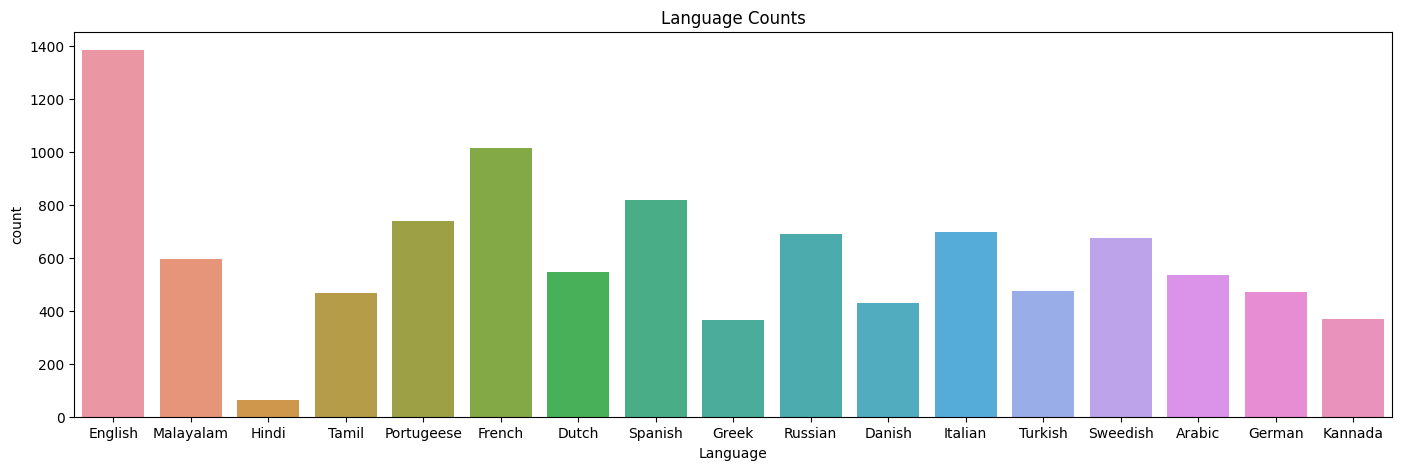

In [ ]:
print(data["Language"].value_counts())
plt.figure(figsize=(17,5))
sns.countplot(x="Language", data=data)
plt.title("Language Counts")
plt.show()

Language Composition

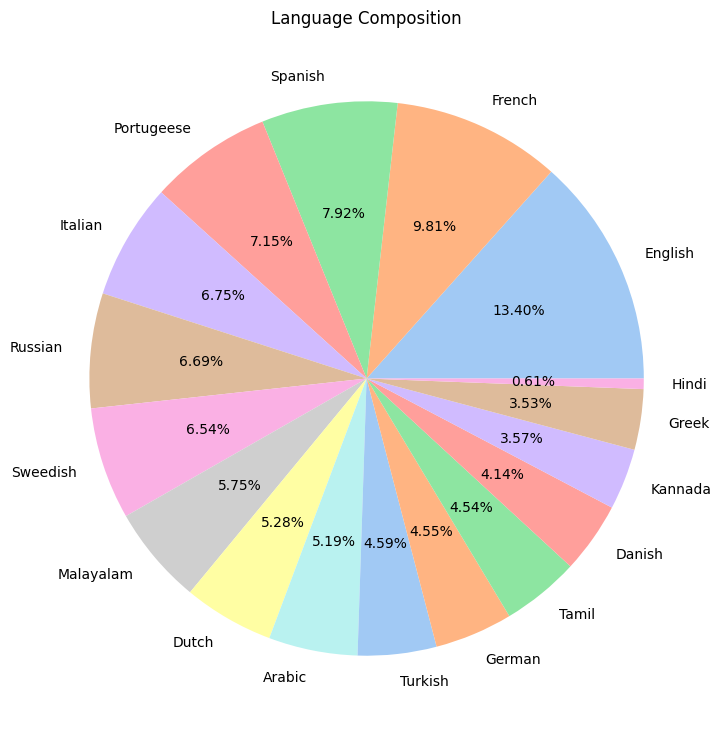

In [ ]:
plt.figure(figsize=(9,9))
clrs = sns.color_palette('pastel')
plt.pie(x = data['Language'].value_counts() ,autopct='%1.2f%%' ,labels=data['Language'].value_counts().index,colors=clrs)
plt.title("Language Composition")
plt.show()

# PreProcessing

In [24]:
print("Before Preprocessing - ")
print("Number of rows = ", data.shape[0])
print("Number of columns = ", data.shape[1])

Before Preprocessing - 
Number of rows =  10337
Number of columns =  2


Making the text lower case

In [25]:
data["Text"] = data["Text"].str.lower()

In [26]:
data

,Text,Language
0,"nature, in the broadest sense, is the natural...",English
1,"""nature"" can refer to the phenomena of the phy...",English
2,"the study of nature is a large, if not the onl...",English
3,"although humans are part of nature, human acti...",English
4,[1] the word nature is borrowed from the old f...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


Duplicate records removal

In [27]:
data[data.duplicated()]

,Text,Language
1141,i'm sorry.,English
1180,oh my god.,English
1196,i'm sorry.,English
1724,എന്നോട് ക്ഷമിക്കൂ.,Malayalam
1767,ഓ എന്റെ ദൈവമേ.,Malayalam
...,...,...
9706,ach du lieber gott.,German
9726,es tut mir leid.,German
10081,ನನ್ನನ್ನು ಕ್ಷಮಿಸು.,Kannada
10125,ಓ ದೇವರೇ.,Kannada


In [28]:
data[data["Text"] == "i'm sorry."]

,Text,Language
1133,i'm sorry.,English
1141,i'm sorry.,English
1196,i'm sorry.,English


In [29]:
data.drop_duplicates(inplace = True)

In [30]:
data[data.duplicated()]

,Text,Language


In [31]:
data

,Text,Language
0,"nature, in the broadest sense, is the natural...",English
1,"""nature"" can refer to the phenomena of the phy...",English
2,"the study of nature is a large, if not the onl...",English
3,"although humans are part of nature, human acti...",English
4,[1] the word nature is borrowed from the old f...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


Tokenizing the text

In [32]:
data["tokens"] = data["Text"].apply(nltk.word_tokenize)

In [33]:
data

,Text,Language,tokens
0,"nature, in the broadest sense, is the natural...",English,"[nature, ,, in, the, broadest, sense, ,, is, t..."
1,"""nature"" can refer to the phenomena of the phy...",English,"[``, nature, '', can, refer, to, the, phenomen..."
2,"the study of nature is a large, if not the onl...",English,"[the, study, of, nature, is, a, large, ,, if, ..."
3,"although humans are part of nature, human acti...",English,"[although, humans, are, part, of, nature, ,, h..."
4,[1] the word nature is borrowed from the old f...,English,"[[, 1, ], the, word, nature, is, borrowed, fro..."
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,"[ನಿಮ್ಮ, ತಪ್ಪು, ಏನು, ಬಂದಿದೆಯೆಂದರೆ, ಆ, ದಿನದಿಂದ, ..."
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,"[ನಾರ್ಸಿಸಾ, ತಾನು, ಮೊದಲಿಗೆ, ಹೆಣಗಾಡುತ್ತಿದ್ದ, ಮಾರ್..."
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,"[ಹೇಗೆ, ', ನಾರ್ಸಿಸಿಸಮ್, ಈಗ, ಮರಿಯನ್, ಅವರಿಗೆ, ಸಂಭ..."
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,"[ಅವಳು, ಈಗ, ಹೆಚ್ಚು, ಚಿನ್ನದ, ಬ್ರೆಡ್, ಬಯಸುವುದಿಲ್ಲ..."


Removing Special characters and punctuations

In [34]:
def remove_punc(text):
  text = ' '.join(text)
  for p in punc:
    text = text.replace(p,"")
  return word_tokenize(text)

punc = string.punctuation
print(punc)
data["rm_punc"] = data["tokens"].apply(remove_punc)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [35]:
data

,Text,Language,tokens,rm_punc
0,"nature, in the broadest sense, is the natural...",English,"[nature, ,, in, the, broadest, sense, ,, is, t...","[nature, in, the, broadest, sense, is, the, na..."
1,"""nature"" can refer to the phenomena of the phy...",English,"[``, nature, '', can, refer, to, the, phenomen...","[nature, can, refer, to, the, phenomena, of, t..."
2,"the study of nature is a large, if not the onl...",English,"[the, study, of, nature, is, a, large, ,, if, ...","[the, study, of, nature, is, a, large, if, not..."
3,"although humans are part of nature, human acti...",English,"[although, humans, are, part, of, nature, ,, h...","[although, humans, are, part, of, nature, huma..."
4,[1] the word nature is borrowed from the old f...,English,"[[, 1, ], the, word, nature, is, borrowed, fro...","[1, the, word, nature, is, borrowed, from, the..."
...,...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,"[ನಿಮ್ಮ, ತಪ್ಪು, ಏನು, ಬಂದಿದೆಯೆಂದರೆ, ಆ, ದಿನದಿಂದ, ...","[ನಿಮ್ಮ, ತಪ್ಪು, ಏನು, ಬಂದಿದೆಯೆಂದರೆ, ಆ, ದಿನದಿಂದ, ..."
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,"[ನಾರ್ಸಿಸಾ, ತಾನು, ಮೊದಲಿಗೆ, ಹೆಣಗಾಡುತ್ತಿದ್ದ, ಮಾರ್...","[ನಾರ್ಸಿಸಾ, ತಾನು, ಮೊದಲಿಗೆ, ಹೆಣಗಾಡುತ್ತಿದ್ದ, ಮಾರ್..."
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,"[ಹೇಗೆ, ', ನಾರ್ಸಿಸಿಸಮ್, ಈಗ, ಮರಿಯನ್, ಅವರಿಗೆ, ಸಂಭ...","[ಹೇಗೆ, ನಾರ್ಸಿಸಿಸಮ್, ಈಗ, ಮರಿಯನ್, ಅವರಿಗೆ, ಸಂಭವಿಸ..."
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,"[ಅವಳು, ಈಗ, ಹೆಚ್ಚು, ಚಿನ್ನದ, ಬ್ರೆಡ್, ಬಯಸುವುದಿಲ್ಲ...","[ಅವಳು, ಈಗ, ಹೆಚ್ಚು, ಚಿನ್ನದ, ಬ್ರೆಡ್, ಬಯಸುವುದಿಲ್ಲ..."


Removal of Stop Words

In [36]:
print(stopwords.words("english"))

all_stops = []

for i in (data['Language'].value_counts().index.str.lower()):
  try:
    all_stops += (stopwords.words(i))
  except:
    pass

print(all_stops)

def stop_removal(text, a):
  removed = []
  for i in range(len(text)):
    if(text[i] not in all_stops):
      removed.append(text[i])
  return removed

data["stop_w"] = (data.apply(lambda x: stop_removal(x["rm_punc"], x["Language"]), axis=1))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [37]:
data

,Text,Language,tokens,rm_punc,stop_w
0,"nature, in the broadest sense, is the natural...",English,"[nature, ,, in, the, broadest, sense, ,, is, t...","[nature, in, the, broadest, sense, is, the, na...","[nature, broadest, sense, natural, physical, m..."
1,"""nature"" can refer to the phenomena of the phy...",English,"[``, nature, '', can, refer, to, the, phenomen...","[nature, can, refer, to, the, phenomena, of, t...","[nature, refer, phenomena, physical, world, li..."
2,"the study of nature is a large, if not the onl...",English,"[the, study, of, nature, is, a, large, ,, if, ...","[the, study, of, nature, is, a, large, if, not...","[study, nature, large, part, science]"
3,"although humans are part of nature, human acti...",English,"[although, humans, are, part, of, nature, ,, h...","[although, humans, are, part, of, nature, huma...","[although, humans, part, nature, human, activi..."
4,[1] the word nature is borrowed from the old f...,English,"[[, 1, ], the, word, nature, is, borrowed, fro...","[1, the, word, nature, is, borrowed, from, the...","[1, word, nature, borrowed, old, french, natur..."
...,...,...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,"[ನಿಮ್ಮ, ತಪ್ಪು, ಏನು, ಬಂದಿದೆಯೆಂದರೆ, ಆ, ದಿನದಿಂದ, ...","[ನಿಮ್ಮ, ತಪ್ಪು, ಏನು, ಬಂದಿದೆಯೆಂದರೆ, ಆ, ದಿನದಿಂದ, ...","[ನಿಮ್ಮ, ತಪ್ಪು, ಏನು, ಬಂದಿದೆಯೆಂದರೆ, ಆ, ದಿನದಿಂದ, ..."
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,"[ನಾರ್ಸಿಸಾ, ತಾನು, ಮೊದಲಿಗೆ, ಹೆಣಗಾಡುತ್ತಿದ್ದ, ಮಾರ್...","[ನಾರ್ಸಿಸಾ, ತಾನು, ಮೊದಲಿಗೆ, ಹೆಣಗಾಡುತ್ತಿದ್ದ, ಮಾರ್...","[ನಾರ್ಸಿಸಾ, ತಾನು, ಮೊದಲಿಗೆ, ಹೆಣಗಾಡುತ್ತಿದ್ದ, ಮಾರ್..."
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,"[ಹೇಗೆ, ', ನಾರ್ಸಿಸಿಸಮ್, ಈಗ, ಮರಿಯನ್, ಅವರಿಗೆ, ಸಂಭ...","[ಹೇಗೆ, ನಾರ್ಸಿಸಿಸಮ್, ಈಗ, ಮರಿಯನ್, ಅವರಿಗೆ, ಸಂಭವಿಸ...","[ಹೇಗೆ, ನಾರ್ಸಿಸಿಸಮ್, ಈಗ, ಮರಿಯನ್, ಅವರಿಗೆ, ಸಂಭವಿಸ..."
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,"[ಅವಳು, ಈಗ, ಹೆಚ್ಚು, ಚಿನ್ನದ, ಬ್ರೆಡ್, ಬಯಸುವುದಿಲ್ಲ...","[ಅವಳು, ಈಗ, ಹೆಚ್ಚು, ಚಿನ್ನದ, ಬ್ರೆಡ್, ಬಯಸುವುದಿಲ್ಲ...","[ಅವಳು, ಈಗ, ಹೆಚ್ಚು, ಚಿನ್ನದ, ಬ್ರೆಡ್, ಬಯಸುವುದಿಲ್ಲ..."


Stemming the tokens

In [38]:
def stemming(text):
  arr = []
  for i in range(len(text)):
    arr.append(stm.stem(text[i]))
  return arr

stm = PorterStemmer()
data["stemm"] = data["stop_w"].apply(stemming)

In [39]:
data

,Text,Language,tokens,rm_punc,stop_w,stemm
0,"nature, in the broadest sense, is the natural...",English,"[nature, ,, in, the, broadest, sense, ,, is, t...","[nature, in, the, broadest, sense, is, the, na...","[nature, broadest, sense, natural, physical, m...","[natur, broadest, sens, natur, physic, materi,..."
1,"""nature"" can refer to the phenomena of the phy...",English,"[``, nature, '', can, refer, to, the, phenomen...","[nature, can, refer, to, the, phenomena, of, t...","[nature, refer, phenomena, physical, world, li...","[natur, refer, phenomena, physic, world, life,..."
2,"the study of nature is a large, if not the onl...",English,"[the, study, of, nature, is, a, large, ,, if, ...","[the, study, of, nature, is, a, large, if, not...","[study, nature, large, part, science]","[studi, natur, larg, part, scienc]"
3,"although humans are part of nature, human acti...",English,"[although, humans, are, part, of, nature, ,, h...","[although, humans, are, part, of, nature, huma...","[although, humans, part, nature, human, activi...","[although, human, part, natur, human, activ, o..."
4,[1] the word nature is borrowed from the old f...,English,"[[, 1, ], the, word, nature, is, borrowed, fro...","[1, the, word, nature, is, borrowed, from, the...","[1, word, nature, borrowed, old, french, natur...","[1, word, natur, borrow, old, french, natur, d..."
...,...,...,...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,"[ನಿಮ್ಮ, ತಪ್ಪು, ಏನು, ಬಂದಿದೆಯೆಂದರೆ, ಆ, ದಿನದಿಂದ, ...","[ನಿಮ್ಮ, ತಪ್ಪು, ಏನು, ಬಂದಿದೆಯೆಂದರೆ, ಆ, ದಿನದಿಂದ, ...","[ನಿಮ್ಮ, ತಪ್ಪು, ಏನು, ಬಂದಿದೆಯೆಂದರೆ, ಆ, ದಿನದಿಂದ, ...","[ನಿಮ್ಮ, ತಪ್ಪು, ಏನು, ಬಂದಿದೆಯೆಂದರೆ, ಆ, ದಿನದಿಂದ, ..."
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,"[ನಾರ್ಸಿಸಾ, ತಾನು, ಮೊದಲಿಗೆ, ಹೆಣಗಾಡುತ್ತಿದ್ದ, ಮಾರ್...","[ನಾರ್ಸಿಸಾ, ತಾನು, ಮೊದಲಿಗೆ, ಹೆಣಗಾಡುತ್ತಿದ್ದ, ಮಾರ್...","[ನಾರ್ಸಿಸಾ, ತಾನು, ಮೊದಲಿಗೆ, ಹೆಣಗಾಡುತ್ತಿದ್ದ, ಮಾರ್...","[ನಾರ್ಸಿಸಾ, ತಾನು, ಮೊದಲಿಗೆ, ಹೆಣಗಾಡುತ್ತಿದ್ದ, ಮಾರ್..."
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,"[ಹೇಗೆ, ', ನಾರ್ಸಿಸಿಸಮ್, ಈಗ, ಮರಿಯನ್, ಅವರಿಗೆ, ಸಂಭ...","[ಹೇಗೆ, ನಾರ್ಸಿಸಿಸಮ್, ಈಗ, ಮರಿಯನ್, ಅವರಿಗೆ, ಸಂಭವಿಸ...","[ಹೇಗೆ, ನಾರ್ಸಿಸಿಸಮ್, ಈಗ, ಮರಿಯನ್, ಅವರಿಗೆ, ಸಂಭವಿಸ...","[ಹೇಗೆ, ನಾರ್ಸಿಸಿಸಮ್, ಈಗ, ಮರಿಯನ್, ಅವರಿಗೆ, ಸಂಭವಿಸ..."
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,"[ಅವಳು, ಈಗ, ಹೆಚ್ಚು, ಚಿನ್ನದ, ಬ್ರೆಡ್, ಬಯಸುವುದಿಲ್ಲ...","[ಅವಳು, ಈಗ, ಹೆಚ್ಚು, ಚಿನ್ನದ, ಬ್ರೆಡ್, ಬಯಸುವುದಿಲ್ಲ...","[ಅವಳು, ಈಗ, ಹೆಚ್ಚು, ಚಿನ್ನದ, ಬ್ರೆಡ್, ಬಯಸುವುದಿಲ್ಲ...","[ಅವಳು, ಈಗ, ಹೆಚ್ಚು, ಚಿನ್ನದ, ಬ್ರೆಡ್, ಬಯಸುವುದಿಲ್ಲ..."


Lemmatization of Stemmed Words

In [40]:
def lemmatizing(text):
  arr = []
  for i in range(len(text)):
    arr.append(lm.lemmatize(text[i]))
  return arr

lm = WordNetLemmatizer()
data["lemma"] = data["stemm"].apply(lemmatizing)

In [41]:
data

,Text,Language,tokens,rm_punc,stop_w,stemm,lemma
0,"nature, in the broadest sense, is the natural...",English,"[nature, ,, in, the, broadest, sense, ,, is, t...","[nature, in, the, broadest, sense, is, the, na...","[nature, broadest, sense, natural, physical, m...","[natur, broadest, sens, natur, physic, materi,...","[natur, broadest, sen, natur, physic, materi, ..."
1,"""nature"" can refer to the phenomena of the phy...",English,"[``, nature, '', can, refer, to, the, phenomen...","[nature, can, refer, to, the, phenomena, of, t...","[nature, refer, phenomena, physical, world, li...","[natur, refer, phenomena, physic, world, life,...","[natur, refer, phenomenon, physic, world, life..."
2,"the study of nature is a large, if not the onl...",English,"[the, study, of, nature, is, a, large, ,, if, ...","[the, study, of, nature, is, a, large, if, not...","[study, nature, large, part, science]","[studi, natur, larg, part, scienc]","[studi, natur, larg, part, scienc]"
3,"although humans are part of nature, human acti...",English,"[although, humans, are, part, of, nature, ,, h...","[although, humans, are, part, of, nature, huma...","[although, humans, part, nature, human, activi...","[although, human, part, natur, human, activ, o...","[although, human, part, natur, human, activ, o..."
4,[1] the word nature is borrowed from the old f...,English,"[[, 1, ], the, word, nature, is, borrowed, fro...","[1, the, word, nature, is, borrowed, from, the...","[1, word, nature, borrowed, old, french, natur...","[1, word, natur, borrow, old, french, natur, d...","[1, word, natur, borrow, old, french, natur, d..."
...,...,...,...,...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,"[ನಿಮ್ಮ, ತಪ್ಪು, ಏನು, ಬಂದಿದೆಯೆಂದರೆ, ಆ, ದಿನದಿಂದ, ...","[ನಿಮ್ಮ, ತಪ್ಪು, ಏನು, ಬಂದಿದೆಯೆಂದರೆ, ಆ, ದಿನದಿಂದ, ...","[ನಿಮ್ಮ, ತಪ್ಪು, ಏನು, ಬಂದಿದೆಯೆಂದರೆ, ಆ, ದಿನದಿಂದ, ...","[ನಿಮ್ಮ, ತಪ್ಪು, ಏನು, ಬಂದಿದೆಯೆಂದರೆ, ಆ, ದಿನದಿಂದ, ...","[ನಿಮ್ಮ, ತಪ್ಪು, ಏನು, ಬಂದಿದೆಯೆಂದರೆ, ಆ, ದಿನದಿಂದ, ..."
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,"[ನಾರ್ಸಿಸಾ, ತಾನು, ಮೊದಲಿಗೆ, ಹೆಣಗಾಡುತ್ತಿದ್ದ, ಮಾರ್...","[ನಾರ್ಸಿಸಾ, ತಾನು, ಮೊದಲಿಗೆ, ಹೆಣಗಾಡುತ್ತಿದ್ದ, ಮಾರ್...","[ನಾರ್ಸಿಸಾ, ತಾನು, ಮೊದಲಿಗೆ, ಹೆಣಗಾಡುತ್ತಿದ್ದ, ಮಾರ್...","[ನಾರ್ಸಿಸಾ, ತಾನು, ಮೊದಲಿಗೆ, ಹೆಣಗಾಡುತ್ತಿದ್ದ, ಮಾರ್...","[ನಾರ್ಸಿಸಾ, ತಾನು, ಮೊದಲಿಗೆ, ಹೆಣಗಾಡುತ್ತಿದ್ದ, ಮಾರ್..."
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,"[ಹೇಗೆ, ', ನಾರ್ಸಿಸಿಸಮ್, ಈಗ, ಮರಿಯನ್, ಅವರಿಗೆ, ಸಂಭ...","[ಹೇಗೆ, ನಾರ್ಸಿಸಿಸಮ್, ಈಗ, ಮರಿಯನ್, ಅವರಿಗೆ, ಸಂಭವಿಸ...","[ಹೇಗೆ, ನಾರ್ಸಿಸಿಸಮ್, ಈಗ, ಮರಿಯನ್, ಅವರಿಗೆ, ಸಂಭವಿಸ...","[ಹೇಗೆ, ನಾರ್ಸಿಸಿಸಮ್, ಈಗ, ಮರಿಯನ್, ಅವರಿಗೆ, ಸಂಭವಿಸ...","[ಹೇಗೆ, ನಾರ್ಸಿಸಿಸಮ್, ಈಗ, ಮರಿಯನ್, ಅವರಿಗೆ, ಸಂಭವಿಸ..."
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,"[ಅವಳು, ಈಗ, ಹೆಚ್ಚು, ಚಿನ್ನದ, ಬ್ರೆಡ್, ಬಯಸುವುದಿಲ್ಲ...","[ಅವಳು, ಈಗ, ಹೆಚ್ಚು, ಚಿನ್ನದ, ಬ್ರೆಡ್, ಬಯಸುವುದಿಲ್ಲ...","[ಅವಳು, ಈಗ, ಹೆಚ್ಚು, ಚಿನ್ನದ, ಬ್ರೆಡ್, ಬಯಸುವುದಿಲ್ಲ...","[ಅವಳು, ಈಗ, ಹೆಚ್ಚು, ಚಿನ್ನದ, ಬ್ರೆಡ್, ಬಯಸುವುದಿಲ್ಲ...","[ಅವಳು, ಈಗ, ಹೆಚ್ಚು, ಚಿನ್ನದ, ಬ್ರೆಡ್, ಬಯಸುವುದಿಲ್ಲ..."


Lemma as string

In [42]:
def lemmatizing_string(text):
  arr = " ".join(text)
  return arr

lm = WordNetLemmatizer()
data["lemma_str"] = data["lemma"].apply(lemmatizing_string)

In [43]:
data

,Text,Language,tokens,rm_punc,stop_w,stemm,lemma,lemma_str
0,"nature, in the broadest sense, is the natural...",English,"[nature, ,, in, the, broadest, sense, ,, is, t...","[nature, in, the, broadest, sense, is, the, na...","[nature, broadest, sense, natural, physical, m...","[natur, broadest, sens, natur, physic, materi,...","[natur, broadest, sen, natur, physic, materi, ...",natur broadest sen natur physic materi world u...
1,"""nature"" can refer to the phenomena of the phy...",English,"[``, nature, '', can, refer, to, the, phenomen...","[nature, can, refer, to, the, phenomena, of, t...","[nature, refer, phenomena, physical, world, li...","[natur, refer, phenomena, physic, world, life,...","[natur, refer, phenomenon, physic, world, life...",natur refer phenomenon physic world life gener
2,"the study of nature is a large, if not the onl...",English,"[the, study, of, nature, is, a, large, ,, if, ...","[the, study, of, nature, is, a, large, if, not...","[study, nature, large, part, science]","[studi, natur, larg, part, scienc]","[studi, natur, larg, part, scienc]",studi natur larg part scienc
3,"although humans are part of nature, human acti...",English,"[although, humans, are, part, of, nature, ,, h...","[although, humans, are, part, of, nature, huma...","[although, humans, part, nature, human, activi...","[although, human, part, natur, human, activ, o...","[although, human, part, natur, human, activ, o...",although human part natur human activ often un...
4,[1] the word nature is borrowed from the old f...,English,"[[, 1, ], the, word, nature, is, borrowed, fro...","[1, the, word, nature, is, borrowed, from, the...","[1, word, nature, borrowed, old, french, natur...","[1, word, natur, borrow, old, french, natur, d...","[1, word, natur, borrow, old, french, natur, d...",1 word natur borrow old french natur deriv lat...
...,...,...,...,...,...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,"[ನಿಮ್ಮ, ತಪ್ಪು, ಏನು, ಬಂದಿದೆಯೆಂದರೆ, ಆ, ದಿನದಿಂದ, ...","[ನಿಮ್ಮ, ತಪ್ಪು, ಏನು, ಬಂದಿದೆಯೆಂದರೆ, ಆ, ದಿನದಿಂದ, ...","[ನಿಮ್ಮ, ತಪ್ಪು, ಏನು, ಬಂದಿದೆಯೆಂದರೆ, ಆ, ದಿನದಿಂದ, ...","[ನಿಮ್ಮ, ತಪ್ಪು, ಏನು, ಬಂದಿದೆಯೆಂದರೆ, ಆ, ದಿನದಿಂದ, ...","[ನಿಮ್ಮ, ತಪ್ಪು, ಏನು, ಬಂದಿದೆಯೆಂದರೆ, ಆ, ದಿನದಿಂದ, ...",ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,"[ನಾರ್ಸಿಸಾ, ತಾನು, ಮೊದಲಿಗೆ, ಹೆಣಗಾಡುತ್ತಿದ್ದ, ಮಾರ್...","[ನಾರ್ಸಿಸಾ, ತಾನು, ಮೊದಲಿಗೆ, ಹೆಣಗಾಡುತ್ತಿದ್ದ, ಮಾರ್...","[ನಾರ್ಸಿಸಾ, ತಾನು, ಮೊದಲಿಗೆ, ಹೆಣಗಾಡುತ್ತಿದ್ದ, ಮಾರ್...","[ನಾರ್ಸಿಸಾ, ತಾನು, ಮೊದಲಿಗೆ, ಹೆಣಗಾಡುತ್ತಿದ್ದ, ಮಾರ್...","[ನಾರ್ಸಿಸಾ, ತಾನು, ಮೊದಲಿಗೆ, ಹೆಣಗಾಡುತ್ತಿದ್ದ, ಮಾರ್...",ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,"[ಹೇಗೆ, ', ನಾರ್ಸಿಸಿಸಮ್, ಈಗ, ಮರಿಯನ್, ಅವರಿಗೆ, ಸಂಭ...","[ಹೇಗೆ, ನಾರ್ಸಿಸಿಸಮ್, ಈಗ, ಮರಿಯನ್, ಅವರಿಗೆ, ಸಂಭವಿಸ...","[ಹೇಗೆ, ನಾರ್ಸಿಸಿಸಮ್, ಈಗ, ಮರಿಯನ್, ಅವರಿಗೆ, ಸಂಭವಿಸ...","[ಹೇಗೆ, ನಾರ್ಸಿಸಿಸಮ್, ಈಗ, ಮರಿಯನ್, ಅವರಿಗೆ, ಸಂಭವಿಸ...","[ಹೇಗೆ, ನಾರ್ಸಿಸಿಸಮ್, ಈಗ, ಮರಿಯನ್, ಅವರಿಗೆ, ಸಂಭವಿಸ...",ಹೇಗೆ ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ್...
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,"[ಅವಳು, ಈಗ, ಹೆಚ್ಚು, ಚಿನ್ನದ, ಬ್ರೆಡ್, ಬಯಸುವುದಿಲ್ಲ...","[ಅವಳು, ಈಗ, ಹೆಚ್ಚು, ಚಿನ್ನದ, ಬ್ರೆಡ್, ಬಯಸುವುದಿಲ್ಲ...","[ಅವಳು, ಈಗ, ಹೆಚ್ಚು, ಚಿನ್ನದ, ಬ್ರೆಡ್, ಬಯಸುವುದಿಲ್ಲ...","[ಅವಳು, ಈಗ, ಹೆಚ್ಚು, ಚಿನ್ನದ, ಬ್ರೆಡ್, ಬಯಸುವುದಿಲ್ಲ...","[ಅವಳು, ಈಗ, ಹೆಚ್ಚು, ಚಿನ್ನದ, ಬ್ರೆಡ್, ಬಯಸುವುದಿಲ್ಲ...",ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...


Creating a new DataFrame with needed Data

In [44]:
data_final = data[["Text", "Language", "lemma","lemma_str"]]
data_final

,Text,Language,lemma,lemma_str
0,"nature, in the broadest sense, is the natural...",English,"[natur, broadest, sen, natur, physic, materi, ...",natur broadest sen natur physic materi world u...
1,"""nature"" can refer to the phenomena of the phy...",English,"[natur, refer, phenomenon, physic, world, life...",natur refer phenomenon physic world life gener
2,"the study of nature is a large, if not the onl...",English,"[studi, natur, larg, part, scienc]",studi natur larg part scienc
3,"although humans are part of nature, human acti...",English,"[although, human, part, natur, human, activ, o...",although human part natur human activ often un...
4,[1] the word nature is borrowed from the old f...,English,"[1, word, natur, borrow, old, french, natur, d...",1 word natur borrow old french natur deriv lat...
...,...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,"[ನಿಮ್ಮ, ತಪ್ಪು, ಏನು, ಬಂದಿದೆಯೆಂದರೆ, ಆ, ದಿನದಿಂದ, ...",ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,"[ನಾರ್ಸಿಸಾ, ತಾನು, ಮೊದಲಿಗೆ, ಹೆಣಗಾಡುತ್ತಿದ್ದ, ಮಾರ್...",ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,"[ಹೇಗೆ, ನಾರ್ಸಿಸಿಸಮ್, ಈಗ, ಮರಿಯನ್, ಅವರಿಗೆ, ಸಂಭವಿಸ...",ಹೇಗೆ ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ್...
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,"[ಅವಳು, ಈಗ, ಹೆಚ್ಚು, ಚಿನ್ನದ, ಬ್ರೆಡ್, ಬಯಸುವುದಿಲ್ಲ...",ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...


In [45]:
print("After Preprocessing - ")
print("Number of rows = ", data_final.shape[0])
print("Number of columns = ", data_final.shape[1])

After Preprocessing - 
Number of rows =  10266
Number of columns =  4


# !!! NER !!! for multiple Languages

In [ ]:
nlp = spacy.load("xx_ent_wiki_sm")

done = []

for index, row in data_final.iterrows():
    text = row['Text']
    lang = row["Language"]

    if(lang not in done):
      doc = nlp(text)

      if(len(doc.ents)!=0):
        print("Text:", text)
        print("Language",lang)
        print("Named Entities:")
        for ent in doc.ents:
            print(f"{ent.text} ({ent.label_})")

        print("\n" + "================" + "\n")

    done.append(lang)

Text: ഭൗതികപ്രപഞ്ചത്തെ മൊത്തത്തിൽ സൂചിപ്പിക്കുന്ന പദമാണ് പ്രകൃതി (ജർമൻ: natur, ഫ്രഞ്ച്, ഇംഗ്ലീഷ്: nature, സ്പാനിഷ്: naturaleza, പോർച്ചുഗീസ്: natureza).
Language Malayalam
Named Entities:
ഫ്രഞ്ച് (MISC)


Text: विकि-शब्दकोष (एक मुक्त शब्दकोष एवं समानांतर कोष) 
 विकिताबें (मुफ़्त क़िताबें और उपयोगी सामग्री) 
 विकिक्वोट (विभिन्न सुभाषितों का संकलन) 
 विकिस्रोत (मुक्त स्त्रोत सामग्री) 
 कॉमंस (विकिमीडिया प्रकल्प का मीडिया फ़ाइल भंडार) 
 विकिसमाचार (मुक्त समाचार) योगदानकर्ताओं के लिए: यह लेख इंटरनेट (इण्टरनेट) विश्वकोश के बारे में बतलाता  है। कि विकिपीडिया के मुख्य पृष्ठ के लिए, विकिपीडिया का मुख्य पृष्ठ देखें। विकिपीडिया के आगंतुक परिचय के लिए, विकिपीडिया के बारे में पृष्ठ देखें। विकिपीडिया  एक मुफ्त,[5] वेब आधारित और सहयोगी बहुभाषी विश्वकोश है, जो गैर-लाभ विकिमीडिया फाउनडेशन से सहयोग प्राप्त परियोजना में उत्पन्न हुआ। इसका नाम दो शब्दों विकी (wiki) (यह सहयोगी वेबसाइटों के निर्माण की एक तकनीक है, यह एक हवाई शब्द विकी है जिसका अर्थ है "जल्दी") और एनसाइक्लोपीडिया (encyclopedia) का संयोजन है। 

# !!! BOW !!! Language Classification using Naive Bayes Algo

## Label Encoding

In [ ]:
X = data_final["Text"]
Y = data_final["Language"]

print("=== Before ===")
print(Y)

le = LabelEncoder()
Y = le.fit_transform(Y)

print("\n=== After ===")
print(Y)

=== Before ===
0        English
1        English
2        English
3        English
4        English
          ...   
10332    Kannada
10333    Kannada
10334    Kannada
10335    Kannada
10336    Kannada
Name: Language, Length: 10266, dtype: object

=== After ===
[3 3 3 ... 9 9 9]


## Bag of Words using CountVectorizer

In [ ]:
data_list = []
for i in X:
  data_list.append(i)

In [ ]:
data_list[:5]

[' nature, in the broadest sense, is the natural, physical, material world or universe.',
 '"nature" can refer to the phenomena of the physical world, and also to life in general.',
 'the study of nature is a large, if not the only, part of science.',
 'although humans are part of nature, human activity is often understood as a separate category from other natural phenomena.',
 '[1] the word nature is borrowed from the old french nature and is derived from the latin word natura, or "essential qualities, innate disposition", and in ancient times, literally meant "birth".']

In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()

In [ ]:
X[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Train Test Split & Model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

In [ ]:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

## Model Performance

In [ ]:
y_pred = model.predict(x_test)

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy = :",ac*100,"%")

Accuracy = : 97.95520934761441 %


## Confusion Matrix

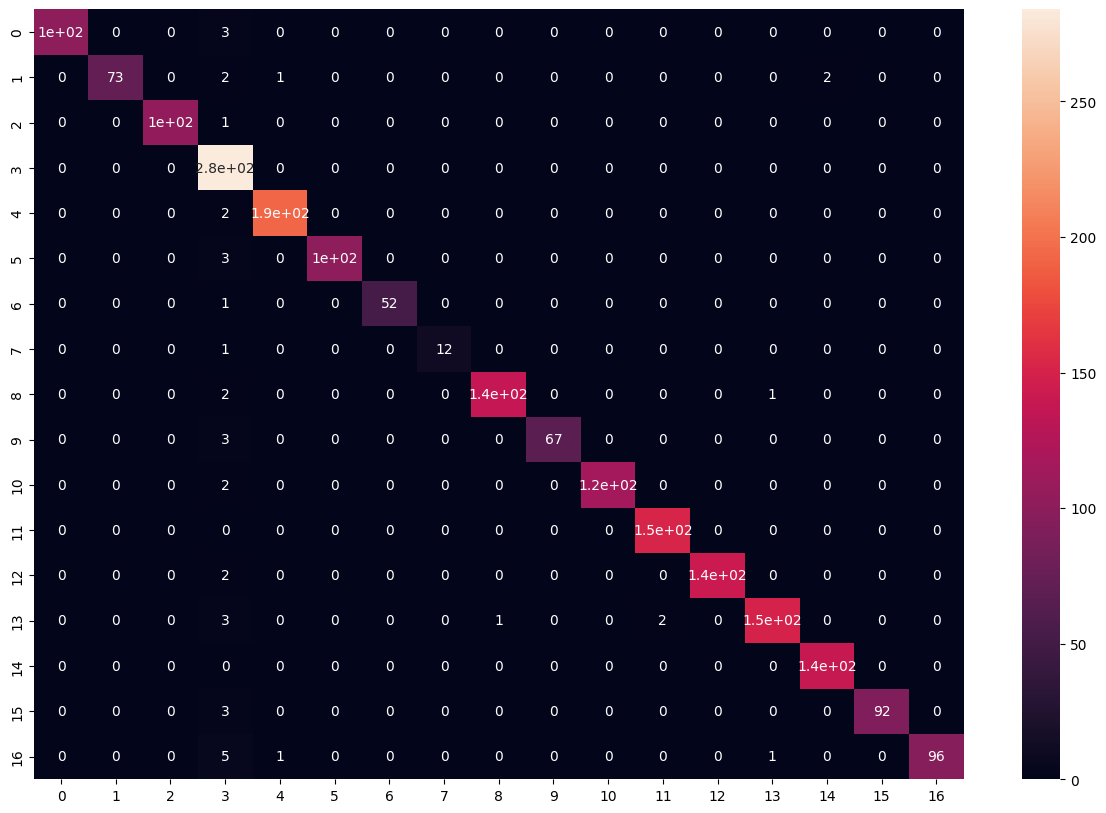

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

## Predicting

In [ ]:
def predict_for(text):
  x = cv.transform([text]).toarray()
  lang = model.predict(x)
  lang = le.inverse_transform(lang)
  print("Predicted language = ",lang[0])

In [ ]:
predict_for("My name is Bhavvuk")

Predicted language =  English


In [ ]:
predict_for("Mijn naam is Bhavvuk")

Predicted language =  Dutch


In [ ]:
predict_for("എന്റെ പേര് ഭാവുക്")

Predicted language =  Malayalam


In [ ]:
predict_for("Меня зовут Бхаввук")

Predicted language =  Russian


In [ ]:
predict_for("اسمي بهافوك")

Predicted language =  English


# !!! Word Embedding !!! Language Classification using Word Vector ( GloVe )

## Loading Gensim and seeing the models available

In [1]:
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec

In [2]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


## Choosing GloVe - Wiki of dimension 200

In [3]:
wv = api.load('glove-wiki-gigaword-200')

[==================================================] 100.0% 252.1/252.1MB downloaded


## Using wv to generate vector represntation

In [4]:
wv["nature"]

array([ 4.9353e-01,  3.5632e-02,  1.9833e-01, -5.6364e-01,  3.8792e-02,
       -2.7784e-01, -1.2492e+00,  6.1339e-01,  9.8554e-02, -5.1919e-01,
       -3.2320e-01,  8.9562e-01, -5.5828e-01,  8.0377e-02, -6.2088e-03,
        4.2652e-01, -3.4291e-01,  8.4557e-01, -1.3914e-01, -1.0990e-01,
        1.6840e-01,  1.9586e+00,  9.2091e-02,  2.3976e-01,  4.2197e-01,
        2.4668e-01,  6.0726e-01, -1.5978e-01, -7.3107e-02,  1.3510e-02,
       -2.0590e-01,  6.0150e-02,  1.6429e-01,  2.6269e-01,  3.3321e-01,
       -5.1849e-01, -6.4531e-01,  2.1591e-01,  1.3680e-01,  1.9932e-01,
        8.9661e-02, -4.4583e-01,  7.9667e-02,  5.1591e-01,  2.9380e-01,
       -8.3658e-02,  4.2667e-01, -8.3806e-03,  3.2340e-01,  1.9021e-01,
       -2.7038e-01,  2.9717e-01, -7.5406e-03,  1.4217e-01, -6.5053e-02,
        3.2451e-01,  2.8061e-01, -6.8079e-02,  1.8897e-01,  1.3027e-01,
        1.1099e-02,  4.2836e-01, -4.0703e-01, -9.3407e-02, -5.5024e-01,
        4.8749e-01,  1.5893e-01,  5.6541e-01, -1.3825e-01,  1.76

In [5]:
len(wv["nature"])

200

In [6]:
try:
  wv["Bhavvuk"]
except:
  print("Word doesn't exist in wv")

Word doesn't exist in wv


## Sentence Vector Representation

In [7]:
def sent_vec(sent):
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)
    # print(wv_res)
    ctr = 1
    for w in sent:
        if w in wv:
            ctr += 1
            wv_res += wv[w]
    wv_res = wv_res/ctr
    return wv_res

In [21]:
sent_vec("Oh my god")

array([ 0.02424786,  0.47895285, -0.2089    ,  0.08100128, -0.00488429,
       -0.16581701, -0.10694743, -0.16790628, -0.59786857, -0.45500428,
       -0.49569484, -0.00583928, -0.01997436,  0.15549286,  0.23301786,
       -0.22806429, -0.29231875, -0.04523271, -0.19509443, -0.351002  ,
        0.03177011,  0.85121285, -0.25842714,  0.01121743,  0.48697714,
       -0.06127394, -0.39606142,  0.01841858, -0.08596686,  0.43911144,
       -0.01498786,  0.30360885, -0.45010143, -0.45554429, -0.14655   ,
       -0.13707343, -0.20196828, -0.32531001, -0.26920457, -0.18184229,
       -0.29324   , -0.03705171,  0.07452743,  0.09019051, -0.34788572,
       -0.13157729,  0.3207243 , -0.38536858, -0.06192786, -0.31823   ,
        0.21026529, -0.03425428,  0.16243485,  0.19240681,  0.25717143,
        0.20458   ,  0.15789386,  0.051384  ,  0.10798443, -0.24282329,
        0.2200331 , -0.05502128, -0.25371243, -0.10039729, -0.06254429,
       -0.47867572, -0.18062714, -0.06253472,  0.81227714,  0.39

In [46]:
data_final["Vec"] = data_final['lemma'].apply(sent_vec)
data_final

<ipython-input-46-451d24ae3a2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final["Vec"] = data_final['lemma'].apply(sent_vec)


,Text,Language,lemma,lemma_str,Vec
0,"nature, in the broadest sense, is the natural...",English,"[natur, broadest, sen, natur, physic, materi, ...",natur broadest sen natur physic materi world u...,"[0.0077401093310779994, -0.019533333265119128,..."
1,"""nature"" can refer to the phenomena of the phy...",English,"[natur, refer, phenomenon, physic, world, life...",natur refer phenomenon physic world life gener,"[0.21547434671083465, -0.005704999901354313, 0..."
2,"the study of nature is a large, if not the onl...",English,"[studi, natur, larg, part, scienc]",studi natur larg part scienc,"[-0.1327465013600886, -0.0630012508481741, 0.2..."
3,"although humans are part of nature, human acti...",English,"[although, human, part, natur, human, activ, o...",although human part natur human activ often un...,"[0.09999581815844233, -0.02518223767930811, 0...."
4,[1] the word nature is borrowed from the old f...,English,"[1, word, natur, borrow, old, french, natur, d...",1 word natur borrow old french natur deriv lat...,"[0.12374718999490142, 0.13572267911513336, 0.3..."
...,...,...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,"[ನಿಮ್ಮ, ತಪ್ಪು, ಏನು, ಬಂದಿದೆಯೆಂದರೆ, ಆ, ದಿನದಿಂದ, ...",ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,"[ನಾರ್ಸಿಸಾ, ತಾನು, ಮೊದಲಿಗೆ, ಹೆಣಗಾಡುತ್ತಿದ್ದ, ಮಾರ್...",ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,"[ಹೇಗೆ, ನಾರ್ಸಿಸಿಸಮ್, ಈಗ, ಮರಿಯನ್, ಅವರಿಗೆ, ಸಂಭವಿಸ...",ಹೇಗೆ ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ್...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,"[ಅವಳು, ಈಗ, ಹೆಚ್ಚು, ಚಿನ್ನದ, ಬ್ರೆಡ್, ಬಯಸುವುದಿಲ್ಲ...",ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,"[-0.24845999479293823, 0.5543500185012817, -0...."


In [47]:
X = data_final['Vec'].to_list()
y = data_final['Language'].to_list()

## Train Test split & Model

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

In [49]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Model Performance

In [50]:
predicted = classifier.predict(X_test)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted)*100,"%")

Logistic Regression Accuracy: 63.09639727361246 %


## Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

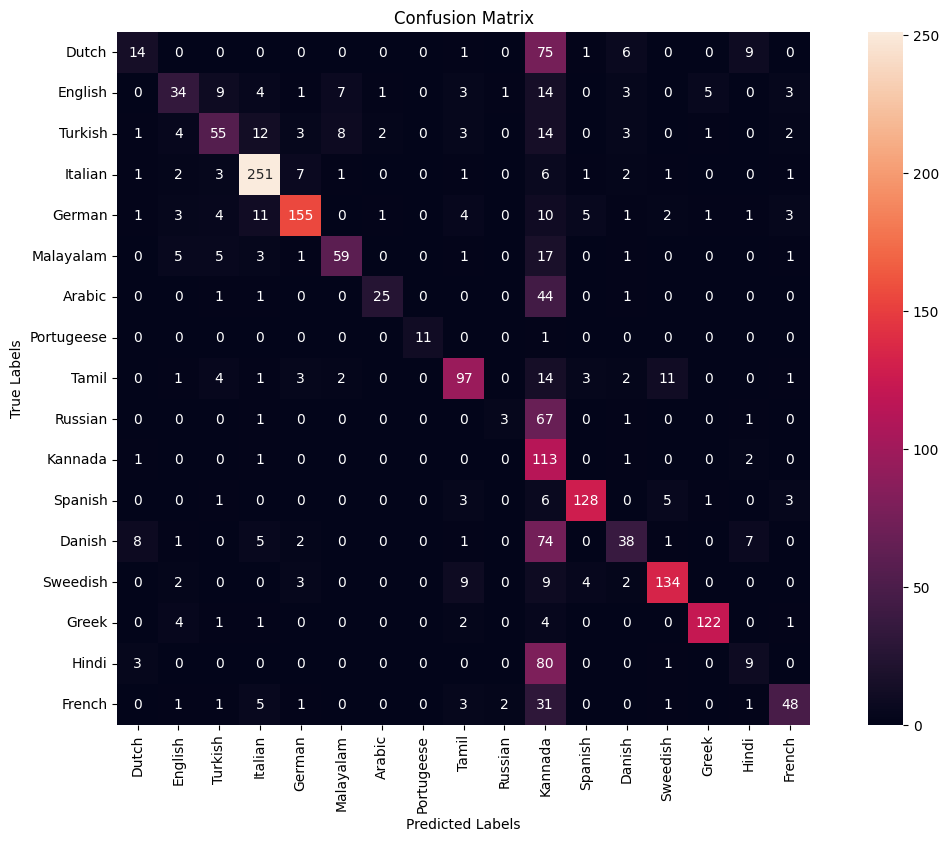

In [85]:
all_langs = list(set(data_final["Language"]))

confm = confusion_matrix(y_test, predicted)

conf_matrix_df = pd.DataFrame(confm, index=all_langs, columns=all_langs)
plt.figure(figsize=(15, 9))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cbar=True, square=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

## Predicting

In [74]:
def prediction_for(text):
  glove_tokens = nltk.word_tokenize(text.lower())
  print(glove_tokens)
  glove_rm = remove_punc(glove_tokens)
  print(glove_rm)
  glove_stem = stemming(glove_rm)
  print(glove_stem)
  glove_lemm = lemmatizing(glove_stem)
  print(glove_lemm)
  lang = classifier.predict([sent_vec(glove_lemm)])
  # lang = le.inverse_transform(lang)
  print("Predicted language = ",lang)

In [75]:
prediction_for("Mother nature plays a very crucial role")

['mother', 'nature', 'plays', 'a', 'very', 'crucial', 'role']
['mother', 'nature', 'plays', 'a', 'very', 'crucial', 'role']
['mother', 'natur', 'play', 'a', 'veri', 'crucial', 'role']
['mother', 'natur', 'play', 'a', 'veri', 'crucial', 'role']
Predicted language =  ['English']


In [76]:
prediction_for("Mère nature joue un rôle très crucial")

['mère', 'nature', 'joue', 'un', 'rôle', 'très', 'crucial']
['mère', 'nature', 'joue', 'un', 'rôle', 'très', 'crucial']
['mère', 'natur', 'joue', 'un', 'rôle', 'trè', 'crucial']
['mère', 'natur', 'joue', 'un', 'rôle', 'trè', 'crucial']
Predicted language =  ['French']


In [77]:
prediction_for("La madre naturaleza juega un papel muy crucial")

['la', 'madre', 'naturaleza', 'juega', 'un', 'papel', 'muy', 'crucial']
['la', 'madre', 'naturaleza', 'juega', 'un', 'papel', 'muy', 'crucial']
['la', 'madr', 'naturaleza', 'juega', 'un', 'papel', 'muy', 'crucial']
['la', 'madr', 'naturaleza', 'juega', 'un', 'papel', 'muy', 'crucial']
Predicted language =  ['Spanish']


In [79]:
prediction_for("प्रकृति बहुत महत्वपूर्ण भूमिका निभाती है")

['प्रकृति', 'बहुत', 'महत्वपूर्ण', 'भूमिका', 'निभाती', 'है']
['प्रकृति', 'बहुत', 'महत्वपूर्ण', 'भूमिका', 'निभाती', 'है']
['प्रकृति', 'बहुत', 'महत्वपूर्ण', 'भूमिका', 'निभाती', 'है']
['प्रकृति', 'बहुत', 'महत्वपूर्ण', 'भूमिका', 'निभाती', 'है']
Predicted language =  ['Hindi']


In [80]:
prediction_for("تلعب الطبيعة الأم دورًا حاسمًا للغاية")

['تلعب', 'الطبيعة', 'الأم', 'دورًا', 'حاسمًا', 'للغاية']
['تلعب', 'الطبيعة', 'الأم', 'دورًا', 'حاسمًا', 'للغاية']
['تلعب', 'الطبيعة', 'الأم', 'دورًا', 'حاسمًا', 'للغاية']
['تلعب', 'الطبيعة', 'الأم', 'دورًا', 'حاسمًا', 'للغاية']
Predicted language =  ['Malayalam']


In [78]:
prediction_for("Мать-природа играет очень важную роль")

['мать-природа', 'играет', 'очень', 'важную', 'роль']
['матьприрода', 'играет', 'очень', 'важную', 'роль']
['матьприрода', 'играет', 'очень', 'важную', 'роль']
['матьприрода', 'играет', 'очень', 'важную', 'роль']
Predicted language =  ['Malayalam']


# !!! LLM !!! Sequence Classification using BERT LLM

## Sampling & combining Languages

In [ ]:
df_eng=data_final.loc[data_final['Language']=='English']
df_fre=data_final.loc[data_final['Language']=='French']
df_spn=data_final.loc[data_final['Language']=='Spanish']

In [ ]:
df_1=df_eng.append(df_fre, ignore_index = True)
df_mix=df_1.append(df_spn, ignore_index = True)

<ipython-input-57-f460d3543a2a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_1=df_eng.append(df_fre, ignore_index = True)
<ipython-input-57-f460d3543a2a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_mix=df_1.append(df_spn, ignore_index = True)


## Tokenizer

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=7)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
sample_data = ["I am an environmentalist","i like nature"]
tokenizer(sample_data, padding=True, truncation=True, max_length=512)

{'input_ids': [[101, 1045, 2572, 2019, 4483, 2923, 102], [101, 1045, 2066, 3267, 102, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 0, 0]]}

## Train Test split

In [ ]:
X = list(df_mix["lemma_str"])
Y = list(df_mix["Language"])

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2,stratify=Y)
X_train_tokenized = tokenizer(X_train, padding=True, truncation=True, max_length=512)
X_val_tokenized = tokenizer(X_val, padding=True, truncation=True, max_length=512)

In [ ]:
len(X_train),len(X_val)

(2564, 641)

In [ ]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings["input_ids"])


## Label Encoder

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

In [ ]:
train_dataset = Dataset(X_train_tokenized, y_train_encoded)
val_dataset = Dataset(X_val_tokenized, y_val_encoded)

In [ ]:
train_dataset[5]

{'input_ids': tensor([  101, 26785,  7971, 11215, 16948, 16475,  2368,  2226, 10514, 15759,
          4830,  6593,  8787,  4221,  2139, 14479,  2938,  4313,  2053, 19908,
          5602,  3477,   102,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,   

In [ ]:
args = TrainingArguments(
    output_dir="output",
    num_train_epochs=7,
    per_device_train_batch_size=8

)
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

## Model Training

In [ ]:
trainer.train()

Step,Training Loss
500,0.213500
1000,0.049600
1500,0.019400
2000,0.010600


TrainOutput(global_step=2247, training_loss=0.06600428555984734, metrics={'train_runtime': 852.4655, 'train_samples_per_second': 21.054, 'train_steps_per_second': 2.636, 'total_flos': 2278251401298600.0, 'train_loss': 0.06600428555984734, 'epoch': 7.0})

In [ ]:
trainer.save_model('/content/drive/MyDrive/NLP/Language_Detection_Model2')

In [ ]:
model = BertForSequenceClassification.from_pretrained("/content/drive/MyDrive/NLP/Language_Detection_Model2")
model.to('cuda')

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

## Prediction

In [ ]:
langs = ["English", "French","Spanish"]
actuals = []
preds = []
txts = []

for i in range(len(X_val)):
  text = X_val[i]

  inputs = tokenizer(text,padding = True, truncation = True, return_tensors='pt').to('cuda')
  outputs = model(**inputs)

  predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
  arr = list(predictions.detach().cpu().numpy()[0])
  txts.append(text)
  preds.append(langs[arr.index(max(arr))])
  actuals.append(y_val[i])


my_preds = pd.DataFrame({"Lemma_Text":txts,"Actual":actuals, "Predicted":preds})
my_preds

,Lemma_Text,Actual,Predicted
0,tan feliz chico 50 frase inglé háganm saber út...,Spanish,Spanish
1,lapprentissag automatiqu comport généralement ...,French,French
2,comm assi pouvez dire fich cest tellement ennu...,French,French
3,free next saturday,English,English
4,like nt matter,English,English
...,...,...,...
636,86 attempt use machin learn healthcar ibm wats...,English,English
637,wikimedia foundat fait part inquiétud quant dé...,French,French
638,siento puedo ahora,Spanish,Spanish
639,114 method evalu contribut later disput aaron ...,English,English


## Evaluation Metrics

In [ ]:
accuracy = accuracy_score(actuals,preds)
precision = precision_score(actuals,preds,average="macro")
recall = recall_score(actuals,preds,average="macro")
f1 = f1_score(actuals,preds,average="macro")

print("Accuracy: ",accuracy*100,"%")
print("Precision: ",precision*100,"%")
print("Recall: ",recall*100,"%")
print("F1: ",f1*100,"%")

Accuracy:  98.12792511700468 %
Precision:  98.12932539888894 %
Recall:  97.86214329341091 %
F1:  97.9894942811853 %


## Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

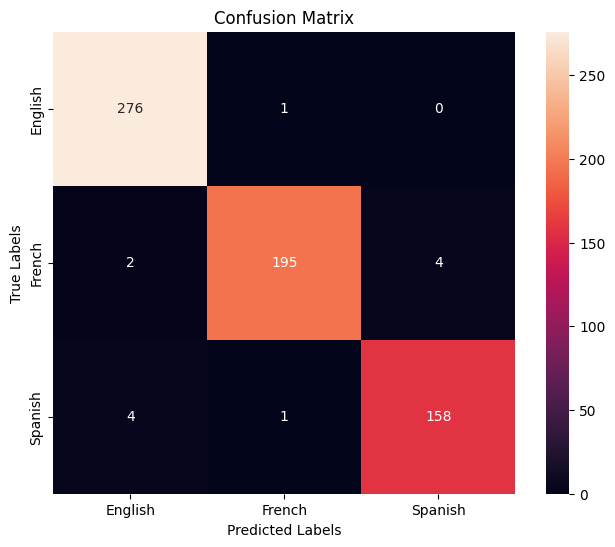

In [ ]:
confm = confusion_matrix(actuals,preds)

conf_matrix_df = pd.DataFrame(confm, index=langs, columns=langs)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cbar=True, square=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')